# 1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/insurance.csv')

In [ ]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df.loc[df['sex'] == 'female','sex'] =1
df.loc[df['sex'] == 'male','sex'] =0
### do the same for region and smoker
df.loc[df['smoker'] == 'no','smoker'] = 0
df.loc[df['smoker'] == 'yes','smoker'] = 1
le = preprocessing.LabelEncoder()
le.fit(df.region)
preprocessing.LabelEncoder
list(le.classes_)
x = le.transform(df.region)

In [ ]:
df['region'] = x
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [ ]:
import numpy as np

In [ ]:
data = np.array(df.iloc[:,:-1])

In [ ]:
cut = int((len(data)*0.8)//1)

In [ ]:
target = np.array(df.charges)

In [ ]:
in_data = data[:cut]
out_data = data[cut:]
in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [ ]:
#use function LassoCV
from sklearn.linear_model import LassoCV
modCV = LassoCV().fit(in_data_scale,in_target)

In [ ]:
a = modCV.alpha_

In [ ]:
print('lambda:',a)

lambda: 133.34880015958146


# 5.) Run a lasso regression with that Lambda

In [ ]:
# use lassso 


In [ ]:
from matplotlib.widgets import Lasso
mod1 = linear_model.Lasso(alpha=a).fit(in_data_scale,in_target)

# 6.) Visualize the coefficients 

In [ ]:
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

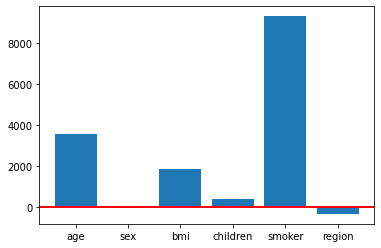

In [ ]:
plt.bar(np.arange(6),modCV.coef_)
plt.xticks(np.arange(6),['age','sex','bmi','children','smoker','region'])
plt.axhline(y=0,linewidth=2, color='r')
plt.show()

# 7.) Interpret the coefficients

In [ ]:
#Lasso as a penealized model and it reduces the coefficient of sex to zero which means sex has no significant relationship with the dependent variable - charges
#every one unit increases in age, the charges for a insurance will increase 3564.26 units.
#every one unit increaes in bmi, the charges for a insurance will increase 1890.85 units.
#every one unit increases in children, the charge for a insurance will increase 398.24 units.
#On average, the smoker has 9324.84 more in the charge for a insurance than the non-smoker.
#On average, the people live in northeast have 326.52 less in the charges for a insurance than the others.

# 8.) Compare in and out of sample MSE’s

In [ ]:
from sklearn.metrics import mean_squared_error
m1 = mod1.predict(in_data_scale)
m2 = mod1.predict(out_data_scale)
print(mean_squared_error(in_target,m1))
print(mean_squared_error(out_target,m2))
#The MSE of out of sample is slightly larger than the in of the sample, the forecate of in of sample is closer to acutal data.

36490415.101693384
37252730.724018715
